In [78]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [79]:
df = pd.read_csv("C:/Users/noelm/Downloads/program_5_dataset - program_5_dataset.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [80]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [81]:
df = df.dropna()
df.shape

(580, 14)

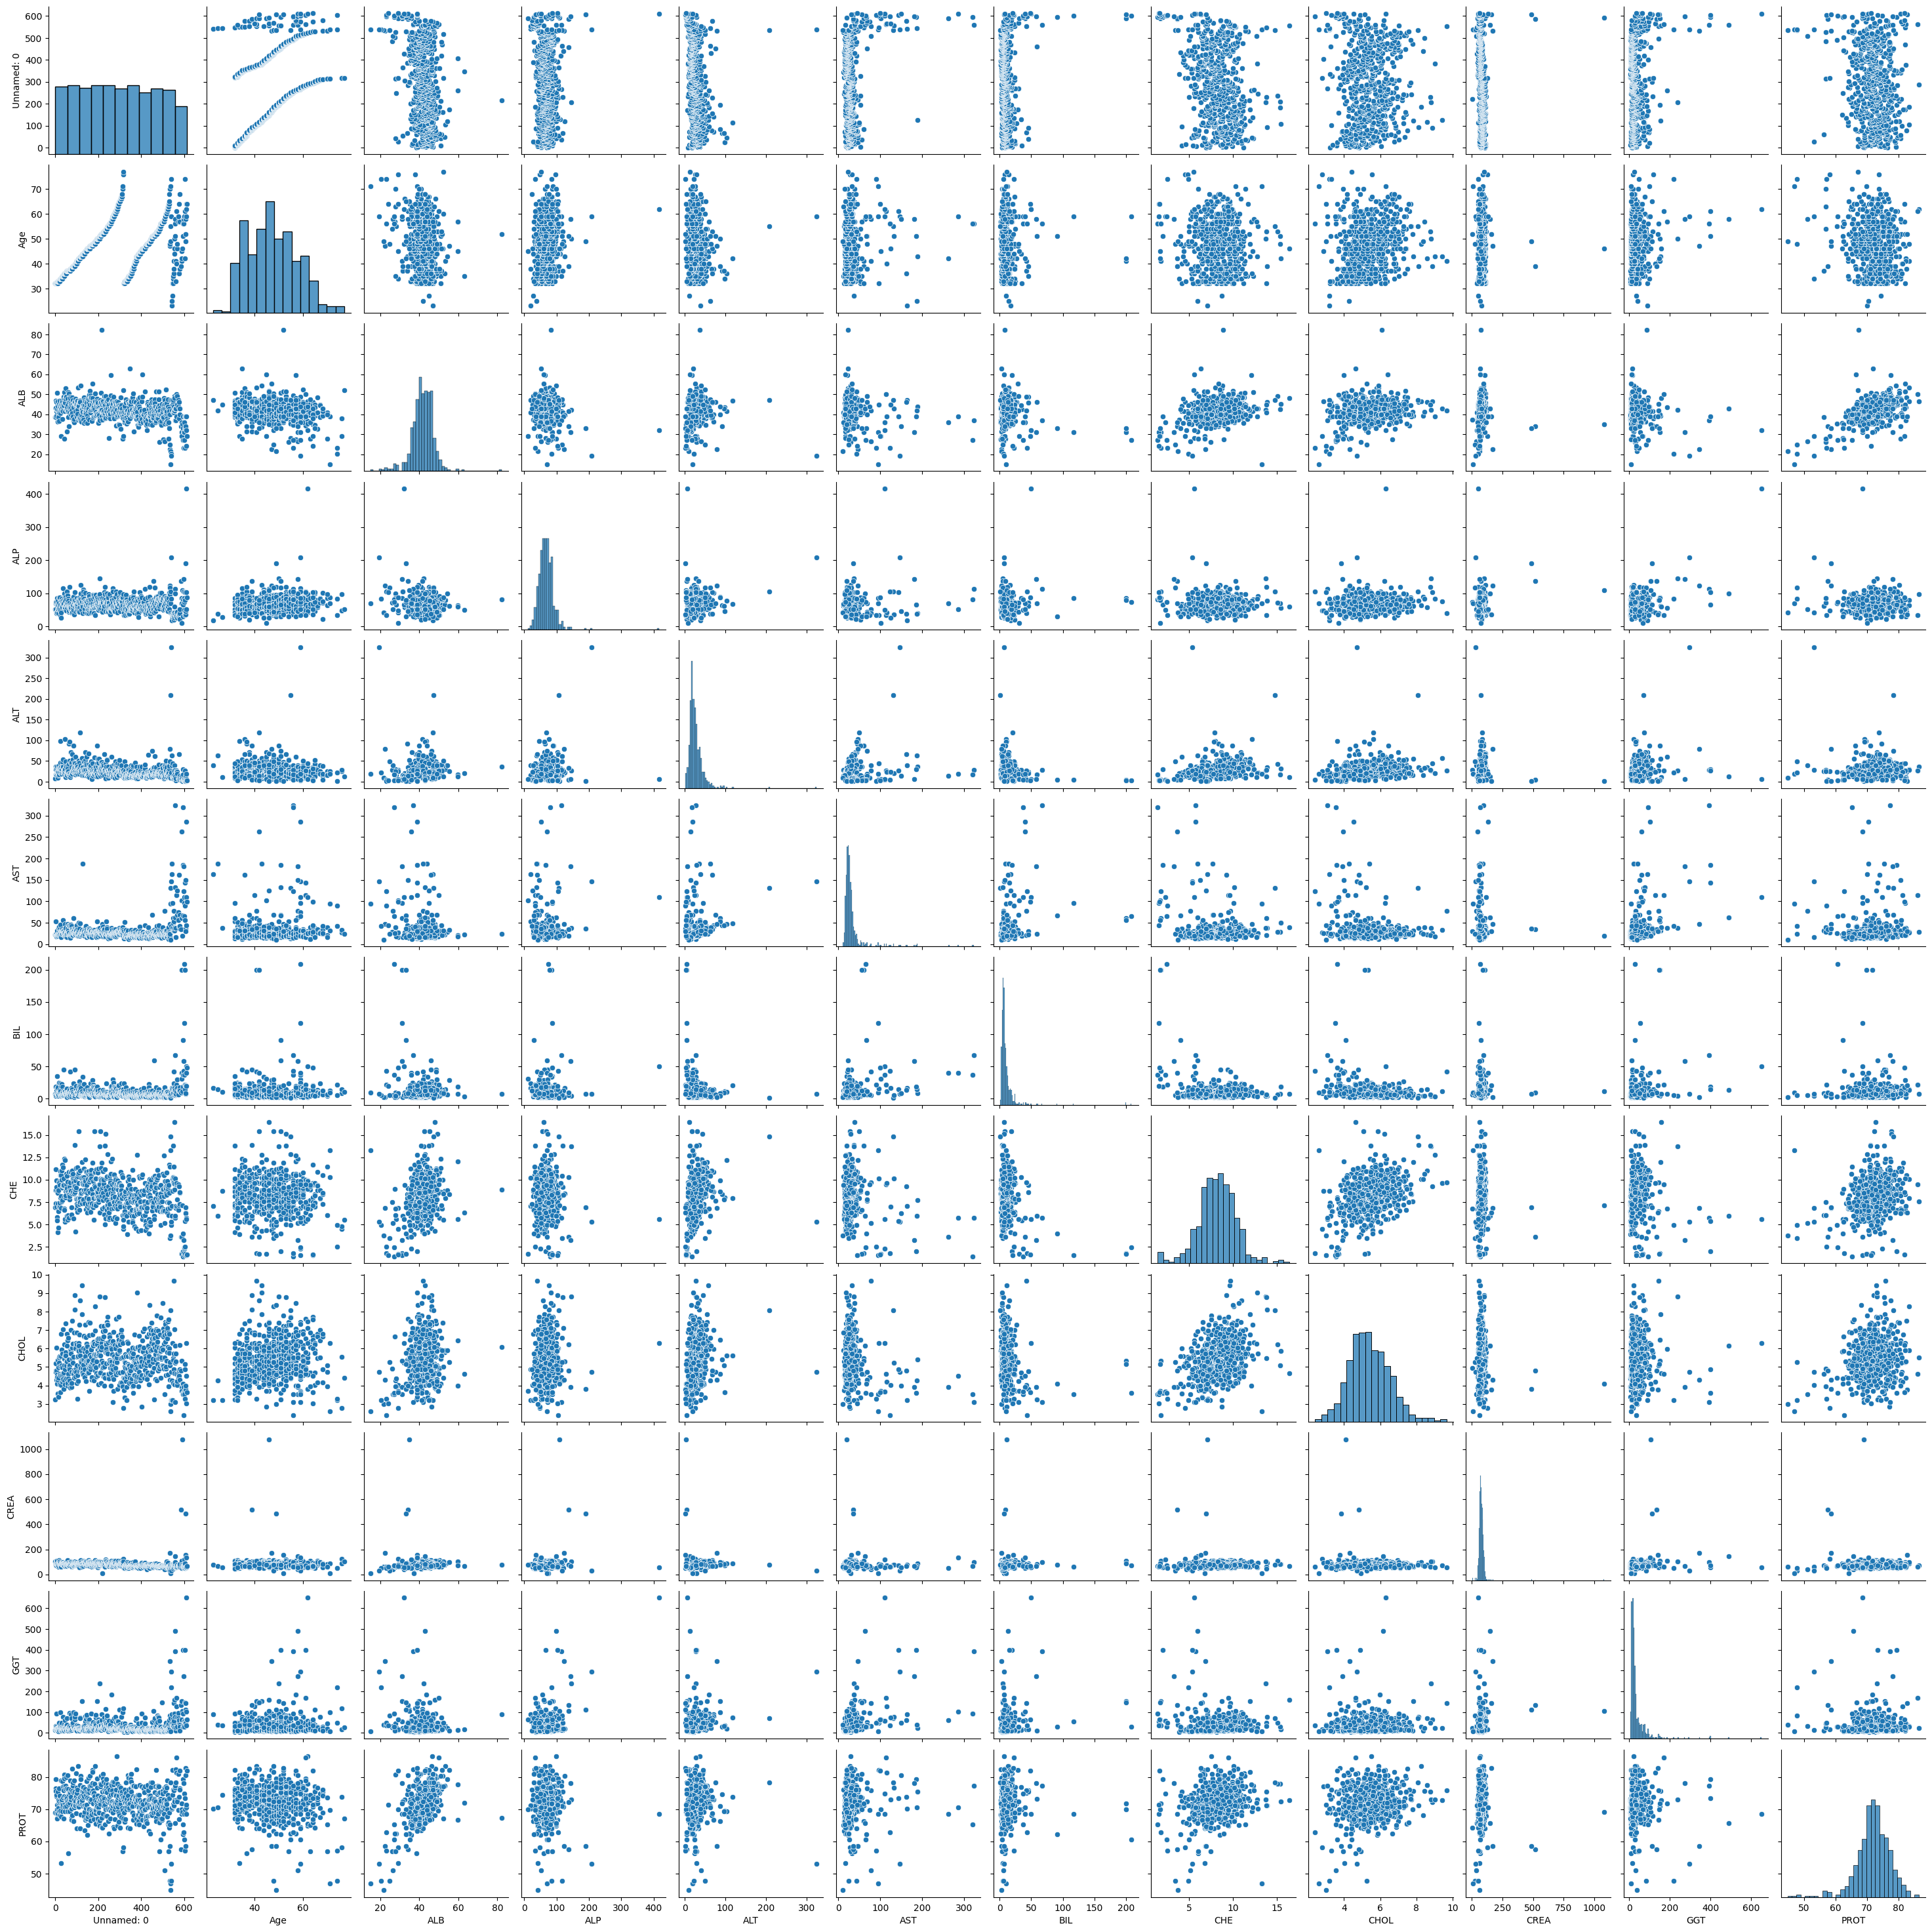

In [82]:
sns.pairplot(df)

In [83]:
numerical_cols = df.select_dtypes(include=['number'])

Text(0.5, 1.0, 'Correlation Matrix')

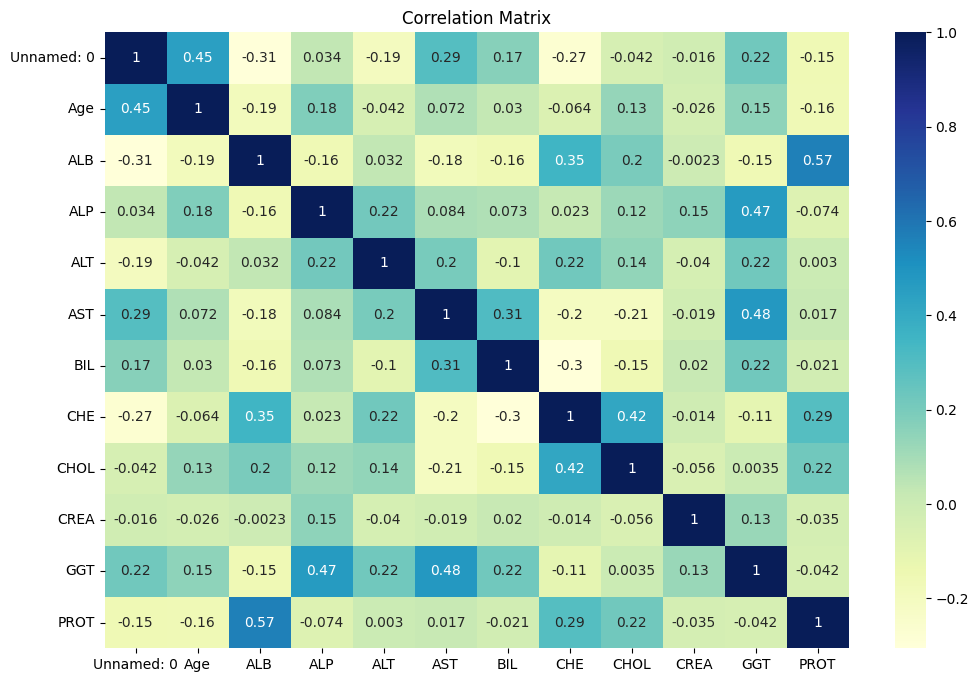

In [84]:
correlation = numerical_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap = 'YlGnBu')
plt.title('Correlation Matrix')

In [85]:
from sklearn.model_selection import train_test_split

X = df[['CREA']].values
y = df['PROT'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## **SIMPLE LINEAR REGRESSION**

Simple Linear Regression models the relationship between one independent variable and a dependent variable. It establishes a linear association without considering multiple factors. The goal is to find the best-fitting line that minimizes the difference between observed and predicted values.

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
coefficient = model.coef_[0]
intercept = model.intercept_

print(f'Coefficient: {coefficient}')
print(f'Intercept: {intercept}')

Coefficient: -0.0036262632638168544
Intercept: 72.21331496647235


In [88]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
n_train=len(y_train)
k_train =1
adj_r2_train = ((1 - r2_train) * (n_train - 1) / (n_train - k_train - 1))

print(f'Training Set Metrics:')
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')
print(f'Train Adjusted R-squared: {adj_r2_train}')

y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
n_test=len(y_test)
k_test =1
adj_r2_test = ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))

print('\nTesting Set Metrics:')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')
print(f'Train Adjusted R-squared: {adj_r2_test}')

Training Set Metrics:
Mean Squared Error: 28.84020207572904
R-squared: 0.001438312305032663
Train Adjusted R-squared: 1.000723076629372

Testing Set Metrics:
Mean Squared Error: 24.98052149031294
R-squared: -0.00025751174954624645
Train Adjusted R-squared: 1.0090317004491036


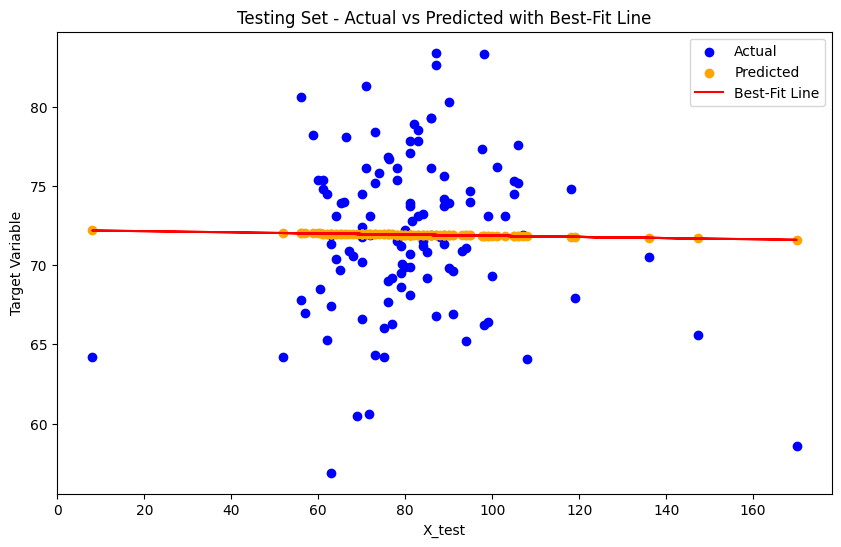

In [108]:

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.scatter(X_test, y_test_pred, label='Predicted', color='orange')
plt.plot(X_test, y_test_pred, label='Best-Fit Line', color='red')
plt.xlabel('X_test')
plt.ylabel('Target Variable')
plt.legend()
plt.title('Testing Set - Actual vs Predicted with Best-Fit Line')
plt.show()

**Variance Inflation Factor (VIF):**

The Variance Inflation Factor (VIF) gauges how much the variance of a regression coefficient is inflated due to multicollinearity. Its functioning involves calculating the VIF for each predictor, with higher values indicating stronger correlations among predictors. A high VIF suggests potential issues, like inflated standard errors, impacting the reliability of regression models. Remedies include removing or combining correlated predictors. VIF serves as a crucial diagnostic tool to ensure the accuracy of regression analyses.

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X=df[['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT']]

vif=pd.Series([variance_inflation_factor(X.values,idx)
    for idx in range(X.shape[1])],
    index=X.columns)

vif

ALB     31.162740
ALP     10.024253
ALT      3.184002
AST      2.938453
BIL      1.678633
CHE     22.397373
CHOL    27.238712
CREA     3.656226
GGT      2.542260
dtype: float64

## **MULTIPLE LINEAR REG**

Multiple Linear Regression extends the concept to involve two or more independent variables. It allows for modeling complex relationships by considering multiple factors influencing the dependent variable. The objective remains the same: minimizing the difference between observed and predicted values.

In [90]:
x_final = df[['ALT','AST','BIL','CREA','GGT']]
y_final = df['PROT']

In [91]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_final, y_final, test_size=0.2, random_state=42)

In [92]:
model1=LinearRegression()

model1.fit(x_final, y_final)

print("Intercept:",model1.intercept_,'\nCoefficeints',model1.coef_)

Intercept: 72.15509768728454 
Coefficeints [ 0.00053251  0.00831675 -0.00725997 -0.00267962 -0.00563103]


In [93]:
Y_train_pred = model1.predict(X_train1)

# Evaluation metrics
mse_train = mean_squared_error(Y_train1, Y_train_pred)
r2_train = r2_score(Y_train1, Y_train_pred)
n_train = len(Y_train1)
k_train = 1
adj_r2_train = ((1 - r2_train) * (n_train - 1) / (n_train - k_train - 1))

# Print metrics
print(f'Training Set Metrics:')
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')
print(f'Train Adjusted R-squared: {adj_r2_train}')

Training Set Metrics:
Mean Squared Error: 28.923176118334798
R-squared: -0.0014345767198682413
Train Adjusted R-squared: 1.0036021840287856


In [94]:
Y_test_pred = model1.predict(X_test1)

mse_test = mean_squared_error(Y_test1, Y_test_pred)
r2_test = r2_score(Y_test1, Y_test_pred)
n_test=len(Y_test1)
k_test =1
adj_r2_test = ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))

print('\nTesting Set Metrics:')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')
print(f'Train Adjusted R-squared: {adj_r2_test}')


Testing Set Metrics:
Mean Squared Error: 24.16168651254571
R-squared: 0.0325298677177942
Train Adjusted R-squared: 0.9759567123899444


## **Polynomial Regression**

Polynomial Regression expands the modeling capability by introducing polynomial terms of the independent variable(s) in addition to linear terms. While Simple and Multiple Linear Regression focus on straight-line relationships, Polynomial Regression accommodates curved relationships. The objective is still to minimize the difference between observed and predicted values.

In [95]:
x_poly = df[['ALB','ALP','CHE','CHOL']]
y_poly = df['PROT']

In [96]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x_poly, y_poly, test_size=0.2, random_state=42)

**DEGREE = 2**

In [97]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly1 = PolynomialFeatures(degree=degree)
X_train_p = poly1.fit_transform(X_train2)
X_test_p = poly1.transform(X_test2)

model1 = LinearRegression()
model1.fit(X_train_p, Y_train2)

y_pred = model1.predict(X_test_p)

In [98]:
print('For degree: 2')
r2 = r2_score(Y_test2, y_pred)
print(f'R-squared: {r2}')


mse = mean_squared_error(Y_test2, y_pred)
print(f'Mean Squared Error: {mse}')


mae = mean_absolute_error(Y_test2, y_pred)
print(f'Mean Absolute Error: {mae}')

For degree: 2
R-squared: 0.250125885207527
Mean Squared Error: 18.727423907907745
Mean Absolute Error: 3.2653667693975796


**DEGREE = 3**

In [99]:
poly2 = PolynomialFeatures(degree=3)
X_train_p = poly2.fit_transform(X_train1)
X_test_p = poly2.transform(X_test1)

model2 = LinearRegression()
model2.fit(X_train_p, Y_train1)

y_pred = model2.predict(X_test_p)



In [100]:
print('For degree = 3')
r2 = r2_score(Y_test1, y_pred)
print(f'R-squared: {r2}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test1, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test1, y_pred)
print(f'Mean Absolute Error: {mae}')

For degree = 3
R-squared: -226.81950591305375
Mean Squared Error: 5689.58492840441
Mean Absolute Error: 18.3816790892698


**DEGREE = 4**

In [101]:
poly2 = PolynomialFeatures(degree=4)
X_train_p = poly2.fit_transform(X_train1)
X_test_p = poly2.transform(X_test1)

model3 = LinearRegression()
model3.fit(X_train_p, Y_train1)

y_pred = model3.predict(X_test_p)

In [102]:
print('For degree = 4')
r2 = r2_score(Y_test1, y_pred)
print(f'R-squared: {r2}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test1, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test1, y_pred)
print(f'Mean Absolute Error: {mae}')

For degree = 4
R-squared: -21481561.68060751
Mean Squared Error: 536482487.6444261
Mean Absolute Error: 3308.0857999413247


## **Lasso & Ridge Regression**

**Ridge Regression:**

Ridge regression, also known as Tikhonov regularization, adds a penalty term to the ordinary least squares (OLS) cost function. The penalty is proportional to the square of the coefficients. The regularization parameter, denoted as α, controls the strength of the penalty. Ridge regression shrinks coefficients toward zero but rarely enforces them to be exactly zero. This helps mitigate multicollinearity by distributing the impact of correlated features more evenly.

**Lasso Regression:**

Lasso regression, or Least Absolute Shrinkage and Selection Operator, introduces a penalty term proportional to the absolute values of the coefficients. The objective is to minimize the OLS cost while adding a penalty term. Similar to Ridge, α is the regularization parameter. Lasso induces sparsity by driving some coefficients to exactly zero, facilitating automatic feature selection and highlighting a subset of the most important features.

***N-Cross Validation***

In [103]:
from sklearn.model_selection import KFold

X3 = df[['ALB']].values
y3 = df['PROT'].values

n_folds = 5
kf = KFold(n_splits = n_folds, shuffle = True, random_state = 42)
train_indices = []
test_indices = []

for train_index, test_index in kf.split(X3):
    train_indices.append(train_index)
    test_indices.append(test_index)


for fold in range(n_folds):
    X_train_r, X_test_r = X3[train_indices[fold]], X3[test_indices[fold]]
    y_train_r, y_test_r = y3[train_indices[fold]], y3[test_indices[fold]]

In [104]:
from sklearn.linear_model import Ridge


def ridge_reg_alpha(X_train_r, y_train_r, X_test_r, y_test_r, alpha_values):
    score_values = []
    mse_values = []
    r2_values = []
    coefficients = []

    for alpha in alpha_values:
        ridge_reg = Ridge(alpha=alpha)
        
        ridge_reg.fit(X_train_r, y_train_r)
        
        y_pred_r = ridge_reg.predict(X_test_r)
        
        mse = mean_squared_error(y_test_r, y_pred_r)
        mse_values.append(mse)

        score = ridge_reg.score(X_test_r, y_test_r)
        score_values.append(score)

        rscore = r2_score(y_test_r, y_pred_r)
        r2_values.append(rscore)

        coefficients.append(ridge_reg.coef_)

    return mse_values, score_values, r2_values, coefficients

alpha_values1 = np.random.uniform(0.1, 150, 13)
mse_values, score_values, r2_values, coefficients = ridge_reg_alpha(X_train_r, y_train_r, X_test_r, y_test_r, alpha_values1)


for alpha, mse, rscore, coeff, score in zip(alpha_values1, mse_values, r2_values, coefficients, score_values):
    print(f'Alpha: {alpha}')
    print(f'MSE: {mse}')
    print(f'R2_Score: {rscore}')
    print(f'Coefficients: {coeff}')
    print(f'Score: {score}')
    print('\n')


Alpha: 132.17981026587344
MSE: 23.72366103338837
R2_Score: 0.13635610750402605
Coefficients: [0.57721255]
Score: 0.13635610750402605


Alpha: 124.50378903739342
MSE: 23.729919056974907
R2_Score: 0.13612828837265323
Coefficients: [0.57753307]
Score: 0.13612828837265323


Alpha: 105.48733447862818
MSE: 23.74549427078986
R2_Score: 0.13556128320988892
Coefficients: [0.57832865]
Score: 0.13556128320988892


Alpha: 40.55600378451108
MSE: 23.799453468308243
R2_Score: 0.1335969349874475
Coefficients: [0.58106173]
Score: 0.1335969349874475


Alpha: 1.1074248075365742
MSE: 23.8328320386649
R2_Score: 0.13238181062750154
Coefficients: [0.58273485]
Score: 0.13238181062750154


Alpha: 113.036747714784
MSE: 23.739298756144642
R2_Score: 0.1357868267453779
Coefficients: [0.57801255]
Score: 0.1357868267453779


Alpha: 68.85348032139692
MSE: 23.775788824576207
R2_Score: 0.13445843039485972
Coefficients: [0.57986747]
Score: 0.13445843039485972


Alpha: 81.53778252046051
MSE: 23.765256049000424
R2_Score: 0

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def lasso_reg_alpha(X_train_r, y_train_r, X_test_r, y_test_r, alpha_values):
    score_values = []
    mse_values = []
    r2_score_values = []
    coefficients = []

    for alpha in alpha_values:
        lasso_reg = Lasso(alpha=alpha)
        
        lasso_reg.fit(X_train_r, y_train_r)
        
        y_pred_r = lasso_reg.predict(X_test_r)
        
        mse = mean_squared_error(y_test_r, y_pred_r)
        mse_values.append(mse)

        score = lasso_reg.score(X_test_r, y_test_r)
        score_values.append(score)

        rscore = r2_score(y_test_r, y_pred_r)  
        r2_score_values.append(rscore)

        coefficients.append(lasso_reg.coef_)

    return mse_values, score_values, r2_score_values, coefficients


alpha_values = np.random.uniform(0.1, 100, 10)
mse_values, score_values, r2_score_values, coefficients = lasso_reg_alpha(X_train_r, y_train_r, X_test_r, y_test_r, alpha_values)


for alpha, mse, r2_score_val, coeff, score in zip(alpha_values, mse_values, r2_score_values, coefficients, score_values):
    print(f'Alpha: {alpha}')
    print(f'MSE: {mse}')
    print(f'R2_Score: {r2_score_val}')
    print(f'Coefficients: {coeff}')
    print(f'Score: {score}')
    print('\n')


Alpha: 73.43762500368784
MSE: 28.111678851441713
R2_Score: -0.02338672406786868
Coefficients: [0.]
Score: -0.02338672406786868


Alpha: 7.134699462431486
MSE: 21.735654129923237
R2_Score: 0.20872815910268572
Coefficients: [0.34112372]
Score: 0.20872815910268572


Alpha: 5.773965011449193
MSE: 21.712436953263676
R2_Score: 0.20957336477287336
Coefficients: [0.38721293]
Score: 0.20957336477287336


Alpha: 14.46879569364983
MSE: 25.297023194601618
R2_Score: 0.0790789183170918
Coefficients: [0.09271174]
Score: 0.0790789183170918


Alpha: 23.392203749221693
MSE: 28.111678851441713
R2_Score: -0.02338672406786868
Coefficients: [0.]
Score: -0.02338672406786868


Alpha: 90.9139715896764
MSE: 28.111678851441713
R2_Score: -0.02338672406786868
Coefficients: [0.]
Score: -0.02338672406786868


Alpha: 71.41137178963659
MSE: 28.111678851441713
R2_Score: -0.02338672406786868
Coefficients: [0.]
Score: -0.02338672406786868


Alpha: 42.27591437941159
MSE: 28.111678851441713
R2_Score: -0.02338672406786868
C

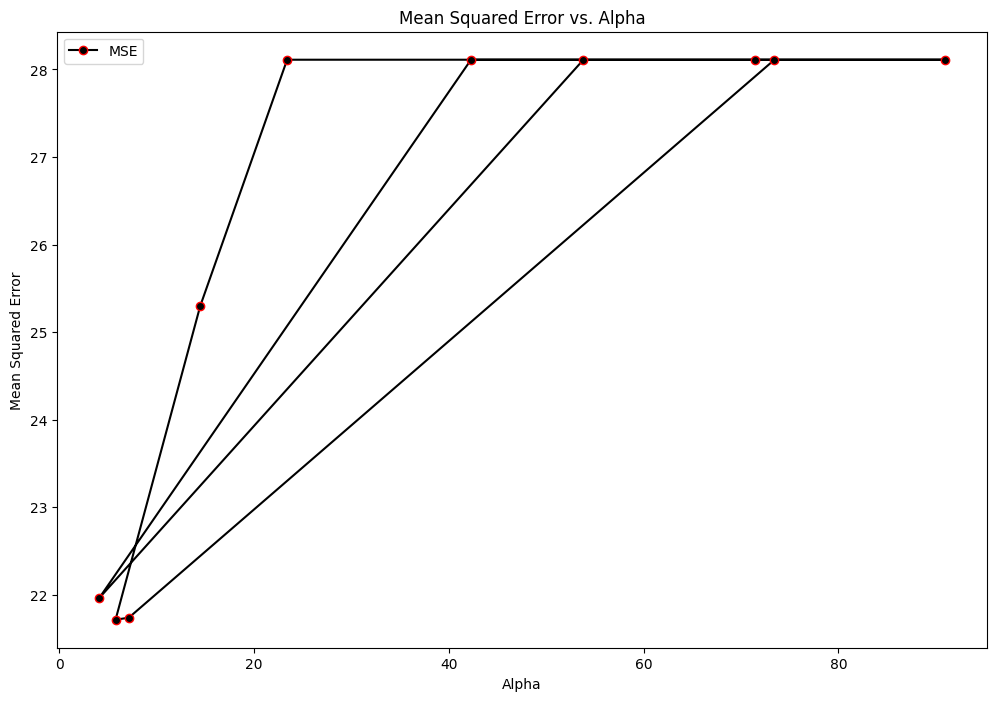

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(alpha_values, mse_values, label='MSE', marker='o', markeredgecolor = 'red', color = 'black')
plt.title('Mean Squared Error vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend()

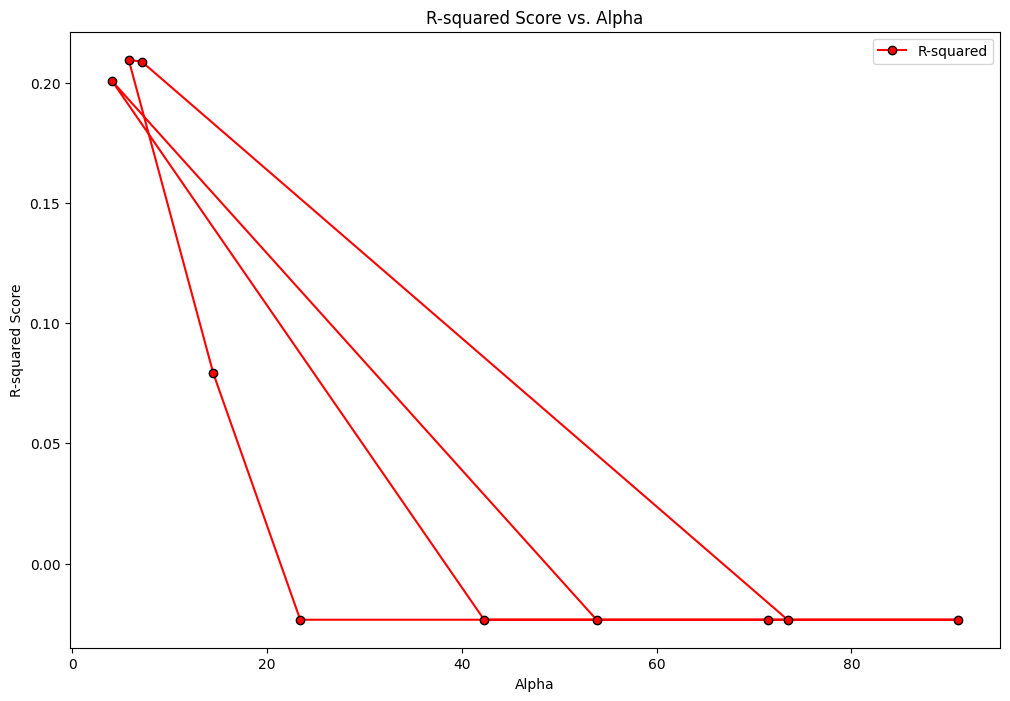

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(alpha_values, r2_score_values, label='R-squared', marker='o', markeredgecolor = 'black', color = 'red')
plt.title('R-squared Score vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('R-squared Score')
plt.legend()